# Importing Libraries

In [68]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

import re
# Algorithms
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Loading the files

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_userID = test['PassengerId']

# Dropping unecessary columns

In [70]:
test = test.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
train = train.drop(['Ticket', 'Cabin','PassengerId'], axis=1)

# Analyze the title of each passenger

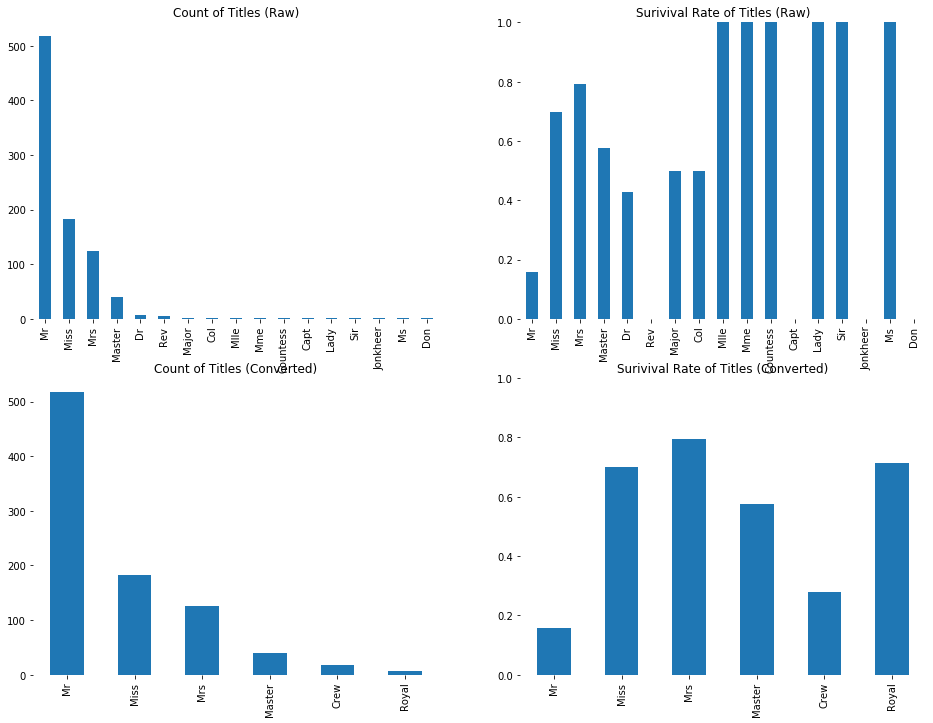

In [71]:
# Extract the title from the Name column
train['Title'] = train['Name'].apply(lambda name: re.findall(',[a-z ]* ([A-Z][a-z]+). |$', name)[0])
test['Title'] = test['Name'].apply(lambda name: re.findall(', ([A-Z][a-z]+). |$', name)[0])

# Create figure for plotting the titles
fig, axs = plt.subplots(2, 2, figsize=[16,12])

# Plot the number of raw titles first extract in a bar plot
train['Title'].value_counts().plot.bar(title='Count of Titles (Raw)', ax=axs[0,0]);
title_order = list(train['Title'].value_counts().index)

train.groupby('Title').mean()['Survived'].reindex(index=title_order).plot.bar(title='Surivival Rate of Titles (Raw)', ax=axs[0,1])

title_map = {'Mr':'Mr',
             'Miss':'Miss', 'Ms':'Miss',
             'Mrs':'Mrs', 'Mme':'Mrs',
             'Master':'Master',
             'Dr':'Crew', 'Rev':'Crew', 'Col':'Crew', 'Capt':'Crew', 'Major':'Crew', 
             'Mlle':'Royal', 'Countess':'Royal', 'Sir':'Royal', 'Lady':'Royal', 'Don':'Royal', 'Jonkheer':'Royal', 'Dona':'Royal'}

train['Title Conv'] = train['Title'].map(title_map)
test['Title Conv'] = test['Title'].map(title_map)

train['Title Conv'].value_counts().plot.bar(title='Count of Titles (Converted)', ax=axs[1,0]);
title_order_conv = list(train['Title Conv'].value_counts().index)

train.groupby('Title Conv').mean()['Survived'].reindex(index=title_order_conv).plot.bar(title='Surivival Rate of Titles (Converted)', ax=axs[1,1])

axs[0,1].set_ylim([0,1])
axs[0,1].set_xlabel('')
axs[1,1].set_ylim([0,1])
axs[1,1].set_xlabel('')

train = train.drop(['Name','Title'], axis=1)
test = test.drop(['Name','Title'], axis=1)

sns.despine(left=True, bottom=True)

# Hot Encoding the category Sex

In [72]:
train['Sex']=train['Sex'].map({'male':0,'female':1})
test['Sex']=test['Sex'].map({'male':0,'female':1})

test.isnull().any()

Pclass        False
Sex           False
Age            True
SibSp         False
Parch         False
Fare           True
Embarked      False
Title Conv    False
dtype: bool

In [73]:
train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())
train.isnull().any()

train.Age=np.log(train.Age)
test.Age =np.log(test.Age)

# Hot Encoding the category Embarked

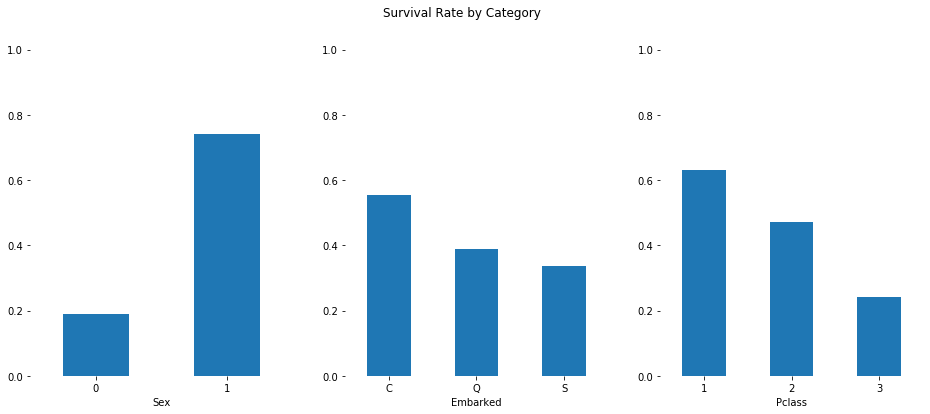

In [74]:
cat_cols = ['Sex','Embarked','Pclass'] # Examine the following three features
fig, axs = plt.subplots(1,3, figsize=[16,6])
fig.suptitle('Survival Rate by Category')

for ax, col in zip(axs, cat_cols): # Loop through a feature and assign it an axis
    train.groupby(col).mean()['Survived'].plot.bar(ax=ax) # Since survived is 1/0 binary, the mean will be the percentage that suvrives
    sns.despine(left=True, bottom=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.set_ylim([0,1])

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())
test['Embarked'] = test['Embarked'].fillna(train['Embarked'].mode())

train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train = pd.get_dummies(train, columns=['Embarked','Pclass'])
test = pd.get_dummies(test, columns=['Embarked','Pclass'])


In [75]:
test['Family_Size']=test['SibSp']+test['Parch']
test
train.isnull().any()

Survived      False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Title Conv    False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
Pclass_1      False
Pclass_2      False
Pclass_3      False
dtype: bool

In [76]:
train
print(train.isnull().any())

Survived      False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Title Conv    False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
Pclass_1      False
Pclass_2      False
Pclass_3      False
dtype: bool


In [77]:
train_na = (train.isna().sum()/len(train)).sort_values(ascending=False).to_frame(name='Train NA')
# Count NA in test data
test_na = (test.isna().sum()/len(train)).to_frame(name='Test NA')
pd.concat([train_na, test_na], axis=1)

C:\Users\Dinos\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Train NA,Test NA
Age,0.0,0.0
Embarked_C,0.0,0.0
Embarked_Q,0.0,0.0
Embarked_S,0.0,0.0
Family_Size,NaN,0.0
Fare,0.0,0.0
Parch,0.0,0.0
Pclass_1,0.0,0.0
Pclass_2,0.0,0.0
Pclass_3,0.0,0.0


In [78]:
train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())
train.isnull().any()

train.Age=np.log(train.Age)
test.Age =np.log(test.Age)

C:\Users\Dinos\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Dinos\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [79]:
train_na = (train.isna().sum()/len(train)).sort_values(ascending=False).to_frame(name='Train NA')
# Count NA in test data
test_na = (test.isna().sum()/len(train)).to_frame(name='Test NA')
pd.concat([train_na, test_na], axis=1)

C:\Users\Dinos\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Train NA,Test NA
Age,0.007856,0.005612
Embarked_C,0.000000,0.000000
Embarked_Q,0.000000,0.000000
Embarked_S,0.000000,0.000000
Family_Size,NaN,0.000000
Fare,0.000000,0.000000
Parch,0.000000,0.000000
Pclass_1,0.000000,0.000000
Pclass_2,0.000000,0.000000
Pclass_3,0.000000,0.000000


In [84]:
key = dict(train.groupby(['Sex','Title Conv']).mean()['Age'])
train['Age'] = train.apply(lambda x: key[(x['Sex'], x['Title Conv'])] if np.isnan(x['Age']) else x['Age'], axis=1)
test['Age'] = test.apply(lambda x: key[(x['Sex'], x['Title Conv'])] if np.isnan(x['Age']) else x['Age'], axis=1)

train.groupby(['Sex','Title Conv']).agg(['count','mean'])['Age']

train = pd.get_dummies(train, columns=['Title Conv'])
test = pd.get_dummies(test, columns=['Title Conv'])

train = train.drop(['Embarked_S','Pclass_3'],axis=1)
test = test.drop(['Embarked_S','Pclass_3'],axis=1)

KeyError: 'Title Conv'

In [83]:
x= train.drop(['Survived'], axis=1)
y= train["Survived"]



x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=418,random_state=0)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)




C:\Users\Dinos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [50]:
Y_prediction = classifier.predict(x_test)

In [35]:
output = pd.DataFrame({'PassengerId': test_userID, 'Survived': Y_prediction})
output.to_csv('submission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
